In [0]:
# File location and type
file_location = "/FileStore/tables/Spotify_data.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df.show(5)

+-----+------+--------------------+------------------------+-------------------------+-----------------------+----------------------+---------------------------+---------------+---------------+----------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------------------+----------------------+------------------------+
|  Age|Gender|spotify_usage_period|spotify_listening_device|spotify_subscription_plan|premium_sub_willingness|preffered_premium_plan|preferred_listening_content|fav_music_genre|music_time_slot|music_Influencial_mood| music_lis_frequency|   music_expl_method|music_recc_rating|   pod_lis_frequency|       fav_pod_genre|preffered_pod_format| pod_host_preference|preffered_pod_duration|pod_variety_satisfaction|
+-----+------+--------------------+------------------------+-------------------------+-----------------------+----------------------+---------------------------+---------------+-----

In [0]:
# Create a view or table

temp_table_name = "Spotify_data_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
display(grouped_data)

spotify_listening_device,music_lis_frequency,count
Computer or laptop,"Workout session, leisure time",1
Computer or laptop,While Traveling,17
Computer or laptop,Workout session,9
Computer or laptop,Study Hours,4
Computer or laptop,"While Traveling, leisure time",2
Computer or laptop,leisure time,1
Computer or laptop,"Office hours, Study Hours, While Traveling",2
Computer or laptop,"Study Hours, Workout session",2
Computer or laptop,"Study Hours, While Traveling, leisure time",1
"Computer or laptop, Smart speakers or voice assistants","Office hours, Study Hours, Workout session",1


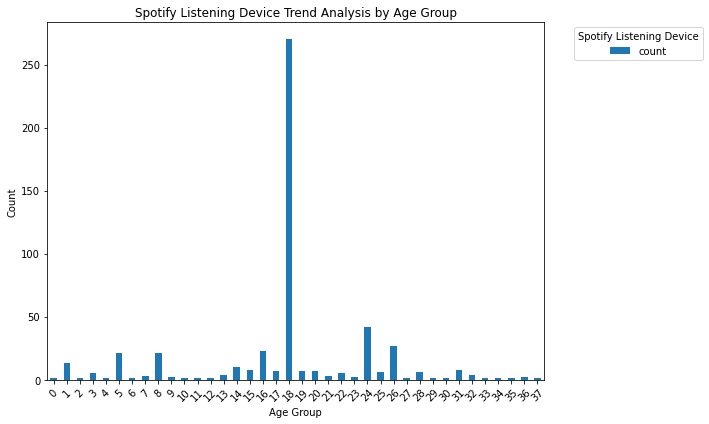

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupBy("Age", "spotify_listening_device").count().orderBy("Age")
pandas_data = grouped_data.toPandas()


# Plotting the bar chart
pandas_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Spotify Listening Device Trend Analysis by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Spotify Listening Device", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

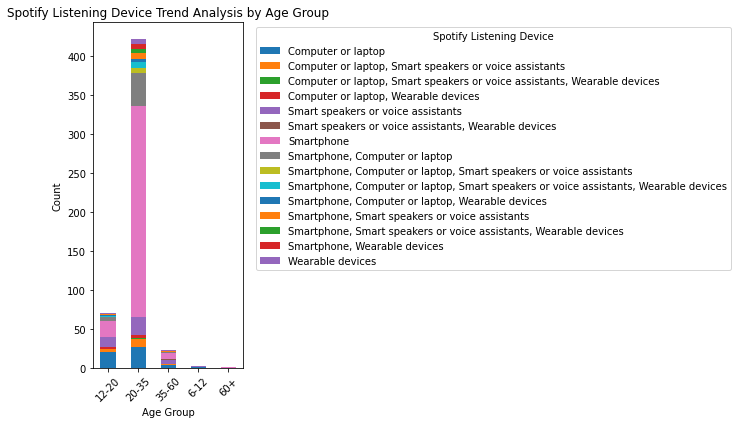

In [0]:
# b) Additionally, create a trend analysis for "spotify_listening_device" for each age group.
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = df.groupBy("Age", "spotify_listening_device").count().orderBy("Age")
pandas_data = grouped_data.toPandas()
pivot_data = pandas_data.pivot(index="Age", columns="spotify_listening_device", values="count")

# Plotting the bar chart
pivot_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Spotify Listening Device Trend Analysis by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Spotify Listening Device", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [0]:
# a) What are the preferred "preferred_listening_content" and "fav_music_genre" for premium subscribers? Please provide this    information for various age groups.

temp_table_name = "Spotify_data_csv"

df.createOrReplaceTempView(temp_table_name)

query = """
SELECT 
  age, 
  preferred_listening_content,
  fav_music_genre
FROM {}
WHERE spotify_subscription_plan LIKE '%Premium%'
""".format(temp_table_name)

result = spark.sql(query)
result.show()



+-----+---------------------------+----------------+
|  age|preferred_listening_content| fav_music_genre|
+-----+---------------------------+----------------+
|12-20|                    Podcast|          Melody|
|12-20|                      Music|             Pop|
|12-20|                    Podcast|       classical|
|20-35|                    Podcast|             Pop|
| 6-12|                    Podcast|       classical|
|20-35|                      Music|Electronic/Dance|
|35-60|                      Music|          Melody|
|20-35|                    Podcast|             Rap|
|12-20|                    Podcast|             Rap|
|12-20|                      Music|          Melody|
|35-60|                    Podcast|             Pop|
|20-35|                      Music|             Rap|
|20-35|                      Music|          Melody|
|20-35|                      Music|             All|
|20-35|                      Music|       classical|
|20-35|                      Music|           

In [0]:
# b) Additionally, create a trend analysis for "spotify_listening_device" for each age group.

query_trend_analysis = """
SELECT 
  age,
  spotify_listening_device,
  COUNT(*) AS device_count
FROM {}
GROUP BY age, spotify_listening_device
ORDER BY age, device_count DESC
""".format(temp_table_name)

result_trend_analysis = spark.sql(query_trend_analysis)

result_trend_analysis.show()

+-----+------------------------+------------+
|  age|spotify_listening_device|device_count|
+-----+------------------------+------------+
|12-20|              Smartphone|          21|
|12-20|      Computer or laptop|          21|
|12-20|    Smart speakers or...|          13|
|12-20|    Smartphone, Compu...|           5|
|12-20|    Computer or lapto...|           3|
|12-20|    Computer or lapto...|           2|
|12-20|    Smartphone, Compu...|           1|
|12-20|    Smartphone, Compu...|           1|
|12-20|    Smartphone, Smart...|           1|
|12-20|        Wearable devices|           1|
|12-20|    Computer or lapto...|           1|
|12-20|    Smartphone, Weara...|           1|
|20-35|              Smartphone|         270|
|20-35|    Smartphone, Compu...|          42|
|20-35|      Computer or laptop|          27|
|20-35|    Smart speakers or...|          23|
|20-35|    Computer or lapto...|          10|
|20-35|    Smartphone, Smart...|           8|
|20-35|    Smartphone, Compu...|  

In [0]:
# c) generate a report indicating the best "music_lis_frequency" for each "spotify_listening_device" based on gender (please apply the filter on gender).

query_report = """
SELECT spotify_listening_device, music_lis_frequency, COUNT(*) as count
FROM {}
WHERE Gender = 'Female'
GROUP BY spotify_listening_device, music_lis_frequency
ORDER BY spotify_listening_device;
""".format(temp_table_name)

result_report = spark.sql(query_report)
result_report.show()

+------------------------+--------------------+-----+
|spotify_listening_device| music_lis_frequency|count|
+------------------------+--------------------+-----+
|      Computer or laptop|Workout session, ...|    1|
|      Computer or laptop|     While Traveling|   17|
|      Computer or laptop|     Workout session|    9|
|      Computer or laptop|         Study Hours|    4|
|      Computer or laptop|While Traveling, ...|    2|
|      Computer or laptop|        leisure time|    1|
|      Computer or laptop|Office hours, Stu...|    2|
|      Computer or laptop|Study Hours, Work...|    2|
|      Computer or laptop|Study Hours, Whil...|    1|
|    Computer or lapto...|Office hours, Stu...|    1|
|    Computer or lapto...|Office hours, Stu...|    1|
|    Computer or lapto...|        Office hours|    1|
|    Computer or lapto...|         Study Hours|    1|
|    Computer or lapto...|Study Hours, Whil...|    4|
|    Computer or lapto...|     While Traveling|    2|
|    Computer or lapto...|  

In [0]:
print(1)

1


In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "Spotify_data_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)